In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from scipy.spatial.distance import pdist, squareform
from scipy.cluster import hierarchy

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

In [2]:
def get_feature_matrix(masstime, data, significant=True):
    if not significant:
        return data.iloc[3:,8:].to_numpy(dtype=float).T
    inds=[]
    for i in range(3,data.shape[0]):
        mt=data.iloc[i,4] + '@' + data.iloc[i,5]
        if mt in masstime:
            inds.append(i)
    inds=np.unique(np.asarray(inds, dtype=int))
    return data.iloc[inds,8:].to_numpy(dtype=float).T

def get_features(masstime, data, significant=True):
    if not significant:
        return data
    inds=[0,1,2]
    for i in range(3,data.shape[0]):
        mt=data.iloc[i,4] + '@' + data.iloc[i,5]
        if mt in masstime:
            inds.append(i)
    inds=np.unique(np.asarray(inds, dtype=int))
    return data.iloc[inds,:]


def get_ids(data):
    ID=[]
    for line in data.iloc[2,8:]:
        ID.append(line.split('_')[-1].split('.')[0])
    return np.array(ID)

def add_noise(x, magnitude):
    return x + np.random.normal(0,magnitude, x.shape)

In [7]:
fnum=1
pathGF = "../../../PDproj/celldata/datawithGFstatus/clean/"
filenamesGF = [line.split('\n')[0] for line in open(pathGF + "filenames.txt")]
print(filenamesGF[fnum])
data = pd.read_csv(pathGF + filenamesGF[fnum],sep=';', header=None)

path_s2 = "../../../PDproj/cellresults/ttest/withGF/only32/ALPHA0.05FC1.0MINVAR0.125/"
filenames_s2 = [line.split('\n')[0] for line in open(path_s2 + "filenames.txt")]
print(filenames_s2[fnum])
df_select = pd.read_csv(path_s2 + filenames_s2[fnum],sep=';')

cellshilicposGFstatus.csv
cellshilicposALPHA0.05FC1.0MINVAR0.125.csv


In [8]:
masstime = np.unique(df_select[' masstime'].to_numpy())
data_significant=get_features(masstime, data, True)

Area = data_significant.iloc[3:,8:48]
groups = data.iloc[0,8:48]
labels = LabelEncoder().fit_transform(groups)

In [9]:
Area.shape

(58, 40)

In [10]:
data_significant.shape

(61, 128)

In [11]:
data_significant.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,aSYN,aSYN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Name,Formula,Annot. DeltaMass [ppm],Calc. MW,m/z,RT [min],MS2,Reference Ion,Area: 221003_SarkaLehtonen_Hilic_pos_0088.raw ...,Area: 221003_SarkaLehtonen_Hilic_pos_0092.raw ...,...,Gap Fill Status: 221003_SarkaLehtonen_Hilic_po...,Gap Fill Status: 221003_SarkaLehtonen_Hilic_po...,Gap Fill Status: 221003_SarkaLehtonen_Hilic_po...,Gap Fill Status: 221003_SarkaLehtonen_Hilic_po...,Gap Fill Status: 221003_SarkaLehtonen_Hilic_po...,Gap Fill Status: 221003_SarkaLehtonen_Hilic_po...,Gap Fill Status: 221003_SarkaLehtonen_Hilic_po...,Gap Fill Status: 221003_SarkaLehtonen_Hilic_po...,Gap Fill Status: 221003_SarkaLehtonen_Hilic_po...,Gap Fill Status: 221003_SarkaLehtonen_Hilic_po...
4,Acetyl-L-carnitine,C9 H17 N O4,0.8,203.11592,204.1232,2.791,DDA for preferred ion,[M+H]+1,26.82393260341057,26.966564272710535,...,0,0,0,0,0,0,0,0,0,0
12,Nicotinamide,C6 H6 N2 O,2.49,122.04832,123.05559,0.665,No MS2,[M+H]+1,22.006117213600273,22.07771837617395,...,0,0,0,64,0,64,64,0,64,0


In [12]:
sorted_ind=np.argsort(data_significant.iloc[3:,5])

In [13]:
data_significant.iloc[sorted_ind+3,:]

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
94,NaN,C30 H57 N O4,-0.07,495.42873,496.436,0.372,No MS2,[M+H]+1,19.054911837856597,18.620844098722333,...,0,0,0,0,0,0,0,0,64,0
106,NaN,C30 H54 O4,-0.21,478.40211,496.436,0.373,No MS2,[M+NH4]+1,19.054911837856597,18.620844098722333,...,64,64,64,64,64,64,64,64,0,64
24,13-hydroxy-alpha-tocopherol,C29 H50 O3,0.19,446.37608,447.38325,0.374,DDA for preferred ion,[M+H]+1,20.88434273807616,20.704578329289475,...,0,0,0,0,0,0,0,0,0,0
303,MFCD09743629,C27 H48 O2,0.67,404.3657,405.3727,0.378,No MS2,[M+H]+1,16.552989929027294,16.172452223805614,...,128,8,8,128,8,128,128,128,128,128
245,NaN,C21 H49 N4 O3 P,1.94,436.35507,419.35186,0.381,No MS2,[M+H-H2O]+1,17.760054334192844,17.391996173856526,...,64,64,64,64,64,128,64,64,128,128
452,"1,2,3-Propanetriyl (9Z,12Z,9'Z,12'Z,9''Z,12''Z...",C54 H92 O6,-0.39,836.68906,419.35181,0.381,No MS2,[M+2H]+2,17.397195301929916,17.391996173856526,...,8,128,128,128,128,128,8,128,0,128
157,NaN,C22 H50 N6 O2 S,-1.72,462.3708,463.37813,0.386,DDA for other ion,[M+H]+1,17.978027415612594,18.07367098096263,...,0,0,0,0,128,128,8,0,0,128
275,NaN,C21 H47 N4 O2 P,2.21,418.34459,419.35184,0.386,No MS2,[M+H]+1,17.760054334192844,17.391996173856526,...,0,0,0,0,0,128,0,0,128,128
433,1-(1Z-hexadecenyl)-2-(9Z-hexadecenoyl)-sn-glyc...,C40 H78 N O7 P,-0.94,715.55092,716.55819,0.458,No MS2,[M+H]+1,16.726702114446134,16.36749974765377,...,0,0,0,0,0,0,0,0,128,128
396,NaN,C45 H82 N O P3,0.26,745.56112,746.56849,0.459,No MS2,[M+H]+1,13.857693968132114,13.849897809054475,...,128,128,8,128,128,128,128,128,128,128


In [14]:
X=data_significant.iloc[sorted_ind+3,8:48].to_numpy(dtype=float).T
#Area_sorted=Area_significant.iloc[sorted_ind,:]

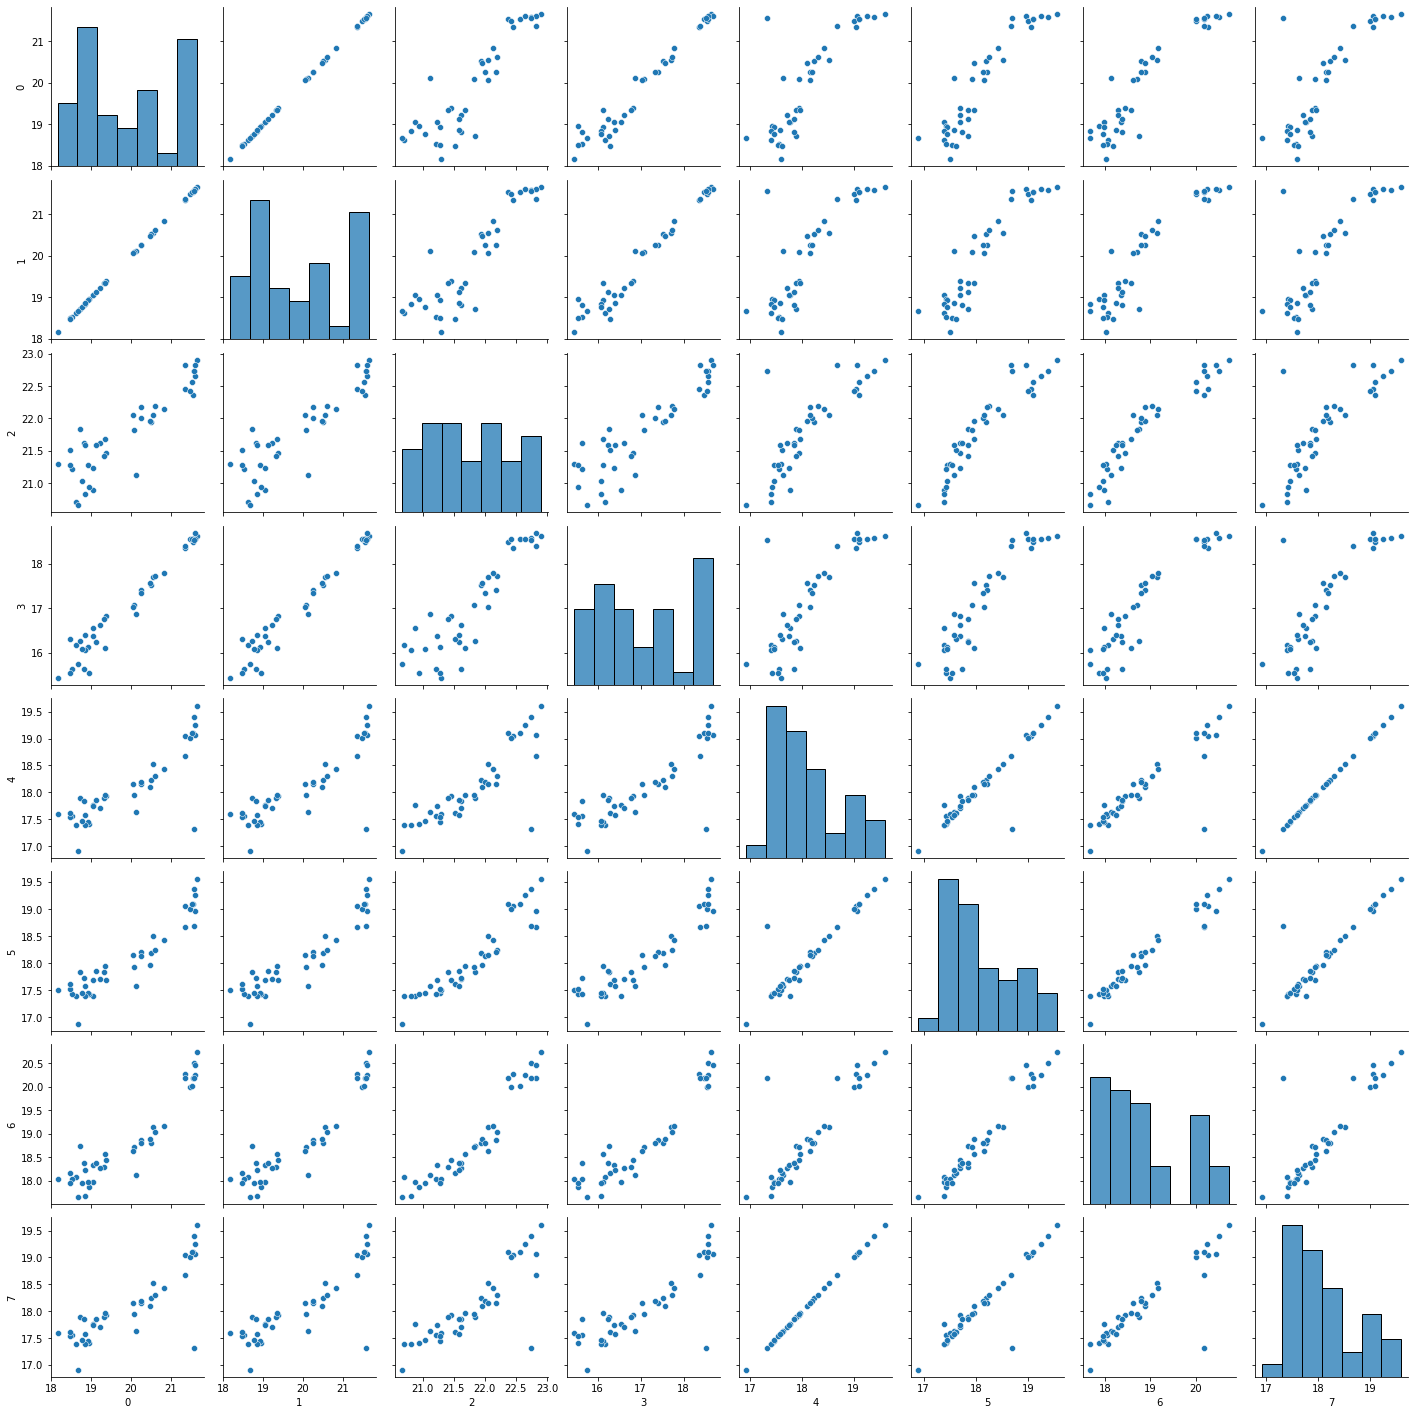

In [15]:
cols=np.arange(0,8)
sns.pairplot(pd.DataFrame(X[:,cols],columns=np.asarray(cols, dtype=str)),)

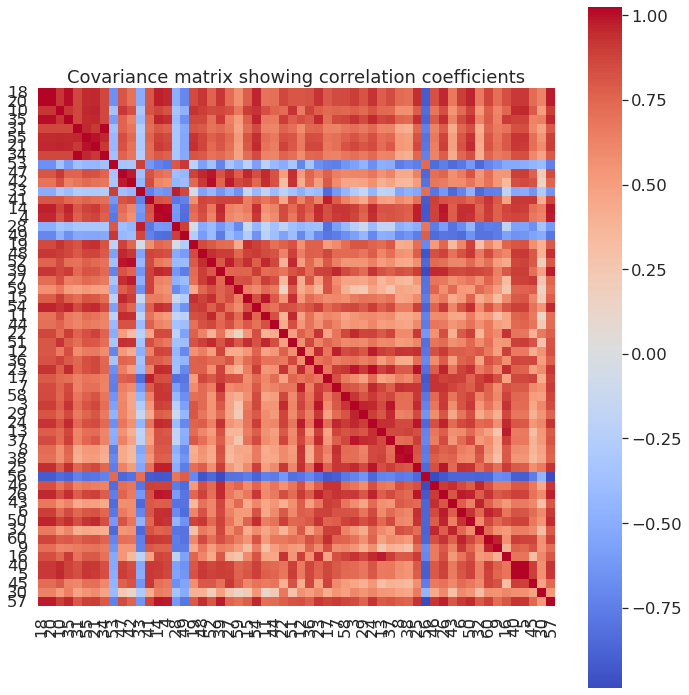

In [31]:
cols = np.asarray(sorted_ind+3,dtype=str)
stdsc = StandardScaler() 
X_std = stdsc.fit_transform(X)
cov_mat =np.cov(X_std.T)
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
hm = sns.heatmap(cov_mat,
                 cbar=True,
                 annot=False,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 12},
                 cmap='coolwarm',                 
                 yticklabels=cols,
                 xticklabels=cols)
plt.title('Covariance matrix showing correlation coefficients', size = 18)
plt.tight_layout()
plt.show()

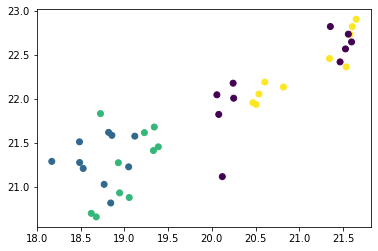

In [84]:
plt.scatter(X[:40,0],X[:40,2],c=labels)

In [121]:
CD=CD-np.eye(CD.shape[0])*np.diagonal(CD)

In [139]:
COV = np.cov(X_std.T, ddof=0)
CD=np.abs(CD-np.eye(CD.shape[0])*np.diagonal(CD))
CD=(np.ones_like(CD)-np.eye(CD.shape[0]))-CD
cd_matrix = squareform(CD,force='tovector')
cd_matrix.shape

(1653,)

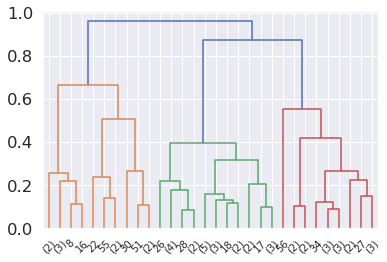

In [158]:
link_complete = hierarchy.linkage(cd_matrix, method='complete',  optimal_ordering=False)
hierarchy.dendrogram(link_complete, truncate_mode='lastp', p=30, labels=np.asarray(np.arange(COV.shape[0])))
labels_complete=hierarchy.fcluster(link_complete, t=0.2, criterion='distance')

In [163]:
labels_complete

array([10, 10, 12, 10, 11, 12, 12, 11,  3,  8,  8,  1,  4, 14, 14,  1,  3,
       12, 10,  8, 10,  8,  5,  8, 10,  8,  9, 16,  8, 13,  7, 14,  4, 13,
       14, 16, 16, 14, 15, 16, 13, 13, 14, 10,  2, 14,  2,  6, 10,  2,  6,
        6, 15, 10, 10,  4, 17, 10], dtype=int32)